* https://www.impactinterview.com/2009/10/140-google-interview-questions/
* https://javarevisited.blogspot.com/2012/01/google-interview-questions-answers-top.html
* https://careercup.com/
* https://www.geeksforgeeks.org/must-do-coding-questions-for-companies-like-amazon-microsoft-adobe/

Prof: Tim Roughgarden's Algorithms class @ Stanford and parts of Prof. Erik Demain's class on Advanced data structures. @ mit

* given set of characters duplicates possible, and given dictionary (list of words). Find longest word from dictionary that can be made from given characters. How will you do it if '*' (matches one wild character) is also included?

* write a class to define a deck of cards, and write shuffle function for the cards.

* Given a function which produces a random integer in the range 1 to 5, write a function which produces a random integer in the range 1 to 7.

* Describe the algorithm for a depth-first graph traversal.

* Suppose you have an NxN matrix of positive and negative integers. Write some code that finds the sub-matrix with the maximum sum of its elements.

* Write some code to reverse a string.

* You have given two lists L1 and L2 write an algorithm to see if both the lists are equivalent or not?

* You have two sorted arrays, where each element is an interval. Now, merge the two array, overlapping intervals can be merged as a single one. 

### Given a string S and a set of words D, find the longest word in D that is a subsequence of S.


Word W is a subsequence of S if some number of characters, possibly zero, can be deleted from S to form W, without reordering the remaining characters.

Note: D can appear in any format (list, hash table, prefix tree, etc.



https://techdevguide.withgoogle.com/resources/find-longest-word-in-dictionary-that-subsequence-of-given-string/

In [6]:
D = {"able", "ale", "apple", "bale", "kangaroo"}

In [7]:
S = "abppplee"

#### function that first checks if one word is subsequence of the other key word

In [8]:
def check_subseq(sub, word):
    j=0
    i=0
    while(j<len(sub)):
        if i == len(word): return True
        
        if word[i] != sub[j] :  # char not match, move to next subseq char, but stay at this word char
            j+=1                
        elif word[i] == sub[j]:  # char match, then move to next chars in both
            j+=1 
            i+=1
    return False

# time complexity: O(len(sub))

In [9]:
check_subseq('abppplee', 'apple')

True

In [10]:
check_subseq('abppplee', 'bale')

False

#### get all `true` subseq from D and get one with max len

In [11]:
def find_max_len_word(S,D):
    max_len = 0
    for w in D:
        if check_subseq(S,w):
            if len(w) > max_len:
                max_len = len(w)
                max_len_word = w
    return max_len_word

# time complexity: O(len(sub).(words in dict))

In [12]:
find_max_len_word(S,D)

'apple'

#### Optimizing it
* Can add little bit of optimization in above by sorting words in D with length and exiting loop when match is found. But overall time complexity will remain same
* The above algo will perform well for cases where all words are of length close to substring length as it is independent of len(word). But it is far from optimal for cases where word lenghts are <<< len(substring)
* We can make it `O(len(S) + total chars for all words in vocab)` by using dictionary. the fact that word in substring can be searched on O(1) with dictionary DS

In [13]:
{v:k for k,v in enumerate(S)}

{'a': 0, 'b': 1, 'p': 4, 'l': 5, 'e': 7}

In [14]:
from collections import defaultdict

In [15]:
sub_map = defaultdict(list)
for k,v in enumerate(S):
    sub_map[v].append(k)

In [16]:
sub_map

defaultdict(list, {'a': [0], 'b': [1], 'p': [2, 3, 4], 'l': [5], 'e': [6, 7]})

In [17]:
len([])

0

In [18]:
def check_subseq_hash(sub, word):
    prev_idx = 0
    for w in word:
        if sub_map[w]:
            match = sub_map[w]
            if len(match) > 0: idx = match[0] # get first value from list (list is sorted)
            else: return False  # empty list
            
            sub_map[w].remove(idx)  # remove the index now
            
            if idx < prev_idx:
                return False
            else: prev_idx = idx
        else: return False # false if char not found in substr
    return True # true if loop completes successfully 
             

# time complexity: O(len(word))

In [19]:
check_subseq_hash('abppplee', 'apple')

True

In [20]:
check_subseq_hash('abppplee', 'bale')

False

This code is wrong. Doesn't work for below case. The below case is actually substring. "apple" is there 

In [22]:
check_subseq_hash("aesf02q3012moaspq1e2sppesdfle", "apple")

False

#### if '*' (matches one wild character) is also included, then we can use DP to match substring with words

### Write a class to define a deck of cards, and write shuffle function for the cards.

In [73]:
ar = range(1,53)

In [76]:
import numpy as np

In [78]:
np.random.permutation(ar)

array([38,  5, 30, 44, 34, 24, 52, 50, 31,  7, 35,  3, 41, 16, 21, 19, 29,
       45, 10, 20, 17, 28,  8, 48,  4, 39, 26, 51, 23, 14, 40, 15, 13, 32,
       18,  1, 47, 49, 36, 42, 33, 12, 37, 27,  2, 25, 22, 43, 46, 11,  9,
        6])

### Find word squares

A “word square” is an ordered sequence of K different words of length K that, when written one word per line, reads the same horizontally and vertically. For example:

In [79]:
words = ['BALL', 'AREA', 'LEAD', 'LADY']

#### Brute force - for loops

In [94]:
def check_word_sq(words):
    v=0
    for i,word in enumerate(words):
        if word == ''.join([w[i] for w in words]):
            v+=1
    if v == len(words): return True
    return False

# time complexity is O(k^2), space = O(1)

In [95]:
check_word_sq(words)

True

#### Second, given an arbitrary list of words, return all the possible word squares it contains. Reordering is allowed.

In [96]:
word_list = ['AREA', 'BALL', 'DEAR', 'LADY', 'LEAD', 'YARD']

can find all combinations by brute force and check each combination whether word square or not. Brute force problem boils down to finding all possible indexes of len(k) from total n words. 

Simplest way is to do this in k for loops. i.e `n^k` time complexity, which is really bad (`for i in range(n-k), for j in range(i+1,n-k+1), for k in range(j+1, n-k+2) ....`)  

This can be improved with `recursion` and can be done in `nCk.k!` time (i.e find all combinations of k words and shuffle them)

In [148]:
from itertools import permutations

In [156]:
perms = permutations(range(6),4)

In [157]:
len(list(perms))

360

In [46]:
def permutations(st, pre):
    if len(st) == 0:
        print(pre)
    for i in range(len(st)):
        r = st[:i] + st[i+1:]
        permutations(r, pre+st[i])    

In [49]:
permutations("abc","")

abc
acb
bac
bca
cab
cba


In [57]:
def permutatations(lst):
    if len(lst) == 0:
        return []
    elif len(lst) == 1:
        return [lst]
    else:  # do permutations in all other except current one
        out = []
        for i in range(len(lst)):
            x=lst[i]
            xs=lst[:i]+lst[i+1:]
            for p in permutatations(xs):
                print(p)
                out.append([x]+list(p))
        return out

In [59]:
out = permutatations(list('abc'))
print(out)

['c']
['b']
['b', 'c']
['c', 'b']
['c']
['a']
['a', 'c']
['c', 'a']
['b']
['a']
['a', 'b']
['b', 'a']
[['a', 'b', 'c'], ['a', 'c', 'b'], ['b', 'a', 'c'], ['b', 'c', 'a'], ['c', 'a', 'b'], ['c', 'b', 'a']]


In [68]:
def combinations(k,available,used):
    if len(used) == k:
        print(used)
    elif len(available) == 0:
        pass
    else:
        head = available.pop(0)
        used.append(head)
        combinations(k,available[:],used[:])
        used.pop()
        combinations(k,available[:],used[:])

In [69]:
combinations(2,['AREA', 'BALL', 'DEAR', 'LADY'],[])

['AREA', 'BALL']
['AREA', 'DEAR']
['AREA', 'LADY']
['BALL', 'DEAR']
['BALL', 'LADY']
['DEAR', 'LADY']


In [141]:
import collections
import sys

def find_word_squares(words):
    # Preprocess words: O(#words * word-length) time and space
    words_by_letter_position = collections.defaultdict(set)
    for word in words:
        for index, letter in enumerate(word):
            words_by_letter_position[(index,letter)].add(word)
    # For each word, see if we can make a square.  O(#words * word-length^2/2)
    # for speed, assuming that set intersection is ~O(1) for small sets.
    # Worst-case storage is O(#words * word-length) for very very contrived
    # 'words'.  Normal English words will result in much smaller storage demand;
    # there is a practical maximum of ~170,000 English words.
    for word in words:
        # Initialize a set of incomplete possible squares; each item is an N-tuple
        # of words that are valid but incomplete word squares.  We could also do
        # depth-first via recursion/generators, but this approach is a little
        # simpler to read top-to-bottom.
        possible_squares = set([(word,)])
        # As long as we have any incomplete squares:
        while possible_squares:
            print('possible_squares:', possible_squares)
            square = possible_squares.pop()
            # When matching an incomplete square with N words already present,
            # we need to match any prospective words to the tuples formed by
            # (N, Nth character in word 0), (N, Nth character in word 1), ...
            # Only words which satisfy all of those restrictions can be added.
            keys = [(i, square[i][len(square)]) for i in range(len(square))]
            print('keys:', keys)
            possible_matches = [words_by_letter_position[key] for key in keys]
            print('possible_matches:', possible_matches)
            for valid_word in set.intersection(*possible_matches):
                valid_square = square + (valid_word,)
                print('valid_square:', valid_square)
                # Save valid square in 'ret' if it's complete, or save it as
                # a work-to-do item if it's not.
                if len(valid_square) == len(word):
                    yield valid_square
                else:
                    possible_squares.add(valid_square)

In [142]:
words_by_letter_position = collections.defaultdict(set)
for word in word_list:
    for index, letter in enumerate(word):
        words_by_letter_position[(index,letter)].add(word)

In [143]:
words_by_letter_position

defaultdict(set,
            {(0, 'A'): {'AREA'},
             (1, 'R'): {'AREA'},
             (2, 'E'): {'AREA'},
             (3, 'A'): {'AREA'},
             (0, 'B'): {'BALL'},
             (1, 'A'): {'BALL', 'LADY', 'YARD'},
             (2, 'L'): {'BALL'},
             (3, 'L'): {'BALL'},
             (0, 'D'): {'DEAR'},
             (1, 'E'): {'DEAR', 'LEAD'},
             (2, 'A'): {'DEAR', 'LEAD'},
             (3, 'R'): {'DEAR'},
             (0, 'L'): {'LADY', 'LEAD'},
             (2, 'D'): {'LADY'},
             (3, 'Y'): {'LADY'},
             (3, 'D'): {'LEAD', 'YARD'},
             (0, 'Y'): {'YARD'},
             (2, 'R'): {'YARD'}})

In [147]:
for square in find_word_squares(word_list):
    print(' '.join(square),'\n')

possible_squares: {('AREA',)}
keys: [(0, 'R')]
possible_matches: [set()]
possible_squares: {('BALL',)}
keys: [(0, 'A')]
possible_matches: [{'AREA'}]
valid_square: ('BALL', 'AREA')
possible_squares: {('BALL', 'AREA')}
keys: [(0, 'L'), (1, 'E')]
possible_matches: [{'LEAD', 'LADY'}, {'DEAR', 'LEAD'}]
valid_square: ('BALL', 'AREA', 'LEAD')
possible_squares: {('BALL', 'AREA', 'LEAD')}
keys: [(0, 'L'), (1, 'A'), (2, 'D')]
possible_matches: [{'LEAD', 'LADY'}, {'YARD', 'LADY', 'BALL'}, {'LADY'}]
valid_square: ('BALL', 'AREA', 'LEAD', 'LADY')
BALL AREA LEAD LADY 

possible_squares: {('DEAR',)}
keys: [(0, 'E')]
possible_matches: [set()]
possible_squares: {('LADY',)}
keys: [(0, 'A')]
possible_matches: [{'AREA'}]
valid_square: ('LADY', 'AREA')
possible_squares: {('LADY', 'AREA')}
keys: [(0, 'D'), (1, 'E')]
possible_matches: [{'DEAR'}, {'DEAR', 'LEAD'}]
valid_square: ('LADY', 'AREA', 'DEAR')
possible_squares: {('LADY', 'AREA', 'DEAR')}
keys: [(0, 'Y'), (1, 'A'), (2, 'R')]
possible_matches: [{'YARD'

### Decompress a compressed string.
https://techdevguide.withgoogle.com/resources/compress-decompression/?programming_languages=python&types=coding-interview-question#!

Your input is a compressed string of the format number[string] and the decompressed output form should be the string written number times. For example:

The input

3[abc]4[ab]c

Would be output as

abcabcabcababababc

In [73]:
import sys

In [121]:
def decompress_str(compress_st, start=0, times=1):
    
    for _ in range(times):
        i = start

        # stop this thing at the end or at encounter of ]
        while i<len(compress_st) and compress_st[i] != ']':

            # start with either letter or number
            # if letter
            if compress_st[i].islower():
                yield compress_st[i]
                
            else:
                # number can be more than 1 digits. 
                sub_times=0
                while compress_st[i].isdigit():
                    sub_times = sub_times*10+ int(compress_st[i])
                    i+=1
                i+=1 # start of [. so skipping one more i

                # run recursive operation if an int is found 
                for item in decompress_str(compress_st, start=i,times=sub_times):
#                     print(item)
#                     yield item
                    if isinstance(item, str):
                        yield item
                    else:
                        i=item 
            i+=1
            
#     index of ] or the end
    if start>0:
        yield i

In [122]:
compress_st = '2[2[bc]a]]'

In [123]:
for letter in decompress_str(compress_st):
    sys.stdout.write(letter)

bcbcabcbca

### Describe the algorithm for a depth-first and breadth-first graph traversal.

Differerence b/w graph and tree is that graph can contains cycles and thus we definitely need `is_visited` function so that we don't get stuck in infinite loop.  

2 main things to keep in mind for DFT algo in graph: 
* need `is_visited`. therefore initialize with all `is_visited=False`
* go to children of children ... before going to neighbours

In [515]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)  # format 0: [1,2], node 0 points to node 1 and 2
        
    def add_edge(self,u,v):
        self.graph[u].append(v)
        
    def dft_util(self,cur_node,is_visited):
        """
        we use 'stack' for this
        """
        is_visited[cur_node] = True  # current node is visited
        print(cur_node)
        
        for node in self.graph[cur_node]:
            print('->',cur_node,node)
            if not is_visited[node]:
                self.dft_util(node,is_visited)
    
    def dft(self,start_node):
        is_visited = [False]*(len(self.graph))  
        self.dft_util(start_node, is_visited)
        
    def bft(self,s):
        """
        for this we use 'queue' ds
        """
        is_visited = [False]*len(self.graph)
        q = []
        q.append(s)
        is_visited[s] = True 
        
        while q:
            s = q.pop(0)
            print(s)
            for i in self.graph[s]:
                if is_visited[i]==False:
                    q.append(i)
                    is_visited[i] = True

In [516]:
gr = Graph()

In [517]:
gr.add_edge(0,1)
gr.add_edge(0,2)
gr.add_edge(1,2)
gr.add_edge(2,0)
gr.add_edge(2,3)
gr.add_edge(3,3)

In [518]:
gr.bft(2)

2
0
3
1


In [519]:
gr.dft(2)

2
-> 2 0
0
-> 0 1
1
-> 1 2
-> 0 2
-> 2 3
3
-> 3 3


Both of the above algorithms work on for vertices which are connected ot each other, but not on disconnected components and time complexity for both is `O(Vertices+Edges)`. for it to work for disconnected components, run recursive functions for all vertices by by one rather than starting with vertex `v`

### Given a function which produces a random integer in the range 1 to 5, write a function which produces a random integer in the range 1 to 7

https://stackoverflow.com/questions/137783/expand-a-random-range-from-1-5-to-1-7

In [520]:
import numpy as np
import matplotlib.pyplot as plt

In [523]:
def rand5():
    return np.random.randint(1,5)

In [550]:
M =[[ 1, 2, 3, 4, 5 ],[6, 7, 1, 2, 3],[4, 5, 6, 7, 1],[2, 3, 4, 5, 6],[7, 0, 0, 0, 0]]
def rand7():
    res=0
    while res == 0:
        i=rand5()
        j=rand5()
        res=M[i-1][j-1]
    return res

In [553]:
out = []
for i in range(100000):
    out.append(rand7())

(array([12609., 18810.,     0., 12492.,     0., 18649., 12395.,     0.,
        12616., 12429.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

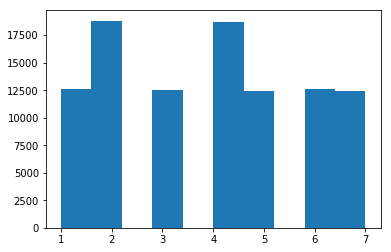

In [554]:
plt.hist(out)

In [557]:
out = []
for i in range(100000):
    out.append(5 * (rand5() - 1) + rand5())

(array([12577., 12582.,  6243., 12373.,  6254.,  6266., 12429.,  6298.,
        12585., 12393.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

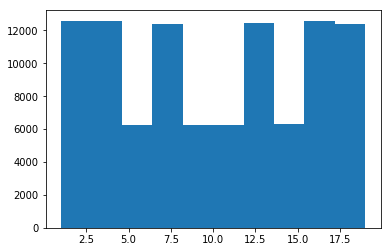

In [558]:
plt.hist(out)

### Write some code to reverse a string.

In [559]:
st = 'whats your name'

In [560]:
st[::-1]

'eman ruoy stahw'

In [562]:
tmp = []
for i in range(len(st)):
    t=len(st)
    tmp.append(st[t-i-1])
''.join(tmp)

# O(N)

'eman ruoy stahw'

### Travelling Salesman Problem (TSP): 
Given a set of cities and distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point.

https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/

Naive solution is to check all path permutations and pick one with smallest total path. there are total `(n-1)!` permutations as first and last are fixed. remaining any node combinations can occur. But this is O(n!) time complexity. let's optimize it by DP

#### Help karp algorithm using DP
NP hard problem. But this apporach can solve it in exponential time

<img src="../images/traveling_salesman.png"  width="600">

<img src="../images/tsp.png"  width="300">

In [563]:
# adjacency matrix based on above picture in graph

D = [[0,10,15,20],[10,0,35,25],[15,35,0,30],[20,25,30,0]]

In [566]:
D[0][2]

15

In [567]:
dp = []
for i in range(4):
    for j in range(4):
        dp[i][j] = -1

IndexError: list index out of range

In [568]:
mask = [2,3,4]

In [ ]:
def min_cost(mask,pos):
    
    for c in range(4):
        mask_new = mask[:].remove(c)
        min_cost(mask_new,pos) + D[pos][1]
        
        cost = dist(j,pos) + min_cost(S-i-j,j)
    return 

* **time complexity**: O(2^n . n^2) (2^n different subsets and for each subset, we check each vertex and we also check which vertex right before each vertex
* **space complexity**: same as time complexity


### Race with N runners
Each runner has a number 1...N, some can be put upside down
686 -> 989
Underline some numbers

1 2 3 4 5 6 7 8 9 10 N=10 return=1

In [16]:
'989'

'989'

In [17]:
def underline(n):
    valid = [8,9,6]
    s=0
    for i in list(str(n)):
        if int(i) in valid:
            s+=1
    if s==len(list(str(n))):
        return True
    else: return False

In [18]:
underline(698)

True

In [19]:
underline(691)

False

In [22]:
def count_upsidable(N):
    cnt=0
    for n in range(N):
        if underline(n):
            cnt+=1
            print(n)
    return cnt

In [23]:
count_upsidable(10)

6
8
9


3